In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/house_prices.csv")
dataset.head()

,Id,SalePrice,GrLivArea,YearBuilt,Neighborhood,OverallCond
0,1,200000,1400,2000,NAmes,Good
1,2,185000,1300,1995,CollgCr,Fair
2,3,250000,1800,2010,NAmes,Good
3,4,275000,2000,2015,StoneBr,Excellent
4,5,225000,1600,2005,Edwards,Fair


In [ ]:
df_processed = dataset.copy()
df_processed = df_processed.drop('Id', axis=1)
df_processed = pd.get_dummies(df_processed, columns=['Neighborhood', 'OverallCond'], drop_first=True)

y = df_processed['SalePrice']
X = df_processed.drop('SalePrice', axis=1)

print("Shape of X after preprocessing:", X.shape)
print("Shape of y after preprocessing:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 rows of y:")
print(y.head())

Shape of X after preprocessing: (10, 8)
Shape of y after preprocessing: (10,)
First 5 rows of X:
   GrLivArea  YearBuilt  Neighborhood_Edwards  Neighborhood_NAmes  \
0       1400       2000                 False                True   
1       1300       1995                 False               False   
2       1800       2010                 False                True   
3       2000       2015                 False               False   
4       1600       2005                  True               False   

   Neighborhood_StoneBr  OverallCond_Fair  OverallCond_Good  OverallCond_Poor  
0                 False             False              True             False  
1                 False              True             False             False  
2                 False             False              True             False  
3                  True             False             False             False  
4                 False              True             False             False  
First 5 

## Train and Evaluate Random Forest Regressor

### Subtask:
Initialize a Random Forest Regressor model. Perform 5-fold cross-validation to evaluate the model's performance using relevant regression metrics such as R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize lists to store scores
rfr_r2_scores = []
rfr_mae_scores = []
rfr_rmse_scores = []

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train Random Forest Regressor
    rfr_model = RandomForestRegressor(random_state=42)
    rfr_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rfr_model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Append scores
    rfr_r2_scores.append(r2)
    rfr_mae_scores.append(mae)
    rfr_rmse_scores.append(rmse)

# Calculate and print average scores
print(f"Average Random Forest R-squared: {np.mean(rfr_r2_scores):.4f}")
print(f"Average Random Forest MAE: {np.mean(rfr_mae_scores):.4f}")
print(f"Average Random Forest RMSE: {np.mean(rfr_rmse_scores):.4f}")

Average Random Forest R-squared: 0.8925
Average Random Forest MAE: 9435.0000
Average Random Forest RMSE: 10841.7240


## Train and Evaluate Linear Regression

### Subtask:
Initialize a Linear Regression model. Perform 5-fold cross-validation to evaluate the model's performance using the same regression metrics (R-squared, MAE, RMSE) as the Random Forest Regressor.


**Reasoning**:
The subtask requires initializing a Linear Regression model, performing 5-fold cross-validation, and evaluating its performance using R-squared, MAE, and RMSE. This involves importing the necessary class, setting up cross-validation using the existing 'kf' object, iterating through folds, training the model, making predictions, and calculating metrics.



In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize lists to store scores for Linear Regression
lr_r2_scores = []
lr_mae_scores = []
lr_rmse_scores = []

# Loop through each fold using the already defined kf object
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Make predictions
    y_pred_lr = lr_model.predict(X_test)

    # Calculate metrics
    r2_lr = r2_score(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

    # Append scores
    lr_r2_scores.append(r2_lr)
    lr_mae_scores.append(mae_lr)
    lr_rmse_scores.append(rmse_lr)

# Calculate and print average scores for Linear Regression
print(f"Average Linear Regression R-squared: {np.mean(lr_r2_scores):.4f}")
print(f"Average Linear Regression MAE: {np.mean(lr_mae_scores):.4f}")
print(f"Average Linear Regression RMSE: {np.mean(lr_rmse_scores):.4f}")

Average Linear Regression R-squared: 0.8449
Average Linear Regression MAE: 9421.7746
Average Linear Regression RMSE: 10985.1909


## Visualize R-squared Scores

### Subtask:
Visualize the R-squared scores obtained from the 5-fold cross-validation for both the Random Forest Regressor and Linear Regression models. Use a box plot or bar plot to compare the distribution and average performance of R-squared scores between the two models.

/tmp/ipython-input-1477440898.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='R2_Score', data=r2_df, palette={'Random Forest': 'skyblue', 'Linear Regression': 'lightcoral'})


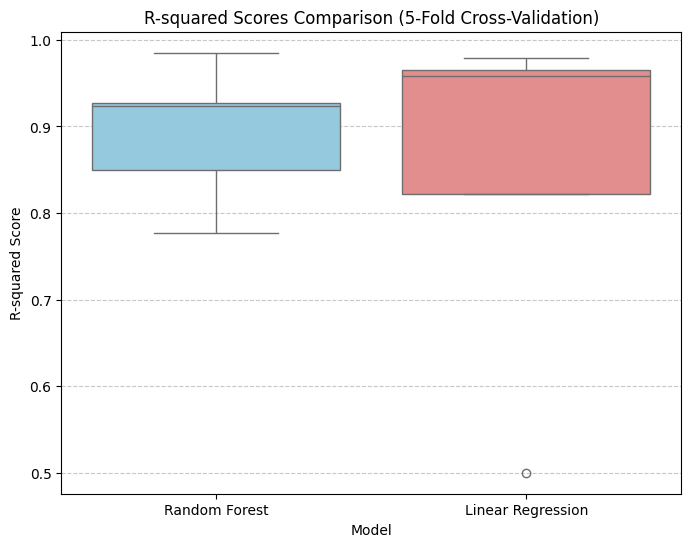

R-squared scores have been visualized using a box plot.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for R-squared scores
r2_data = {
    'Model': ['Random Forest'] * len(rfr_r2_scores) + ['Linear Regression'] * len(lr_r2_scores),
    'R2_Score': rfr_r2_scores + lr_r2_scores
}
r2_df = pd.DataFrame(r2_data)

# Plot the R-squared scores
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='R2_Score', data=r2_df, palette={'Random Forest': 'skyblue', 'Linear Regression': 'lightcoral'})
plt.title('R-squared Scores Comparison (5-Fold Cross-Validation)')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("R-squared scores have been visualized using a box plot.")

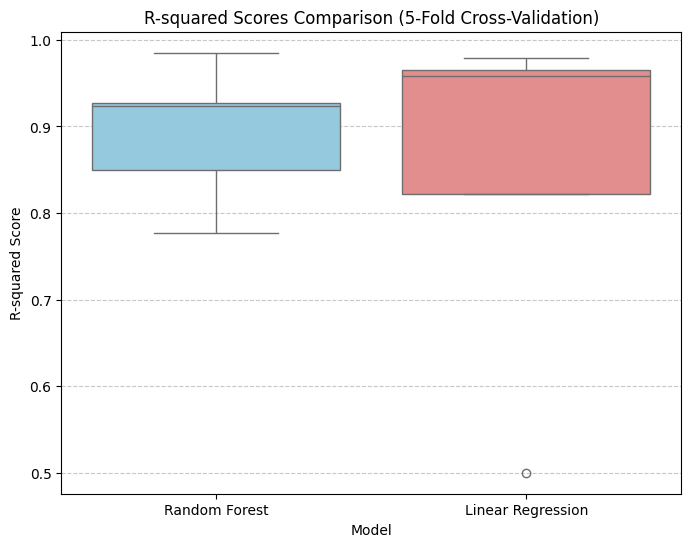

R-squared scores have been visualized using a box plot.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for R-squared scores
r2_data = {
    'Model': ['Random Forest'] * len(rfr_r2_scores) + ['Linear Regression'] * len(lr_r2_scores),
    'R2_Score': rfr_r2_scores + lr_r2_scores
}
r2_df = pd.DataFrame(r2_data)

# Plot the R-squared scores
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='R2_Score', data=r2_df, hue='Model', palette={'Random Forest': 'skyblue', 'Linear Regression': 'lightcoral'}, legend=False)
plt.title('R-squared Scores Comparison (5-Fold Cross-Validation)')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("R-squared scores have been visualized using a box plot.")

### Summary of Performance and Stability

**Random Forest Regressor:**
*   **Average R-squared:** 0.8925
*   **Average MAE:** 9435.0000
*   **Average RMSE:** 10841.7240

**Linear Regression:**
*   **Average R-squared:** 0.8449
*   **Average MAE:** 9421.7746
*   **Average RMSE:** 10985.1909



## Summary:

### Data Analysis Key Findings

*   **Data Preprocessing:** The dataset was preprocessed by dropping the 'Id' column, applying one-hot encoding to 'Neighborhood' and 'OverallCond' features, and separating 'SalePrice' as the target variable. The resulting feature set `X` had 8 columns, and the target `y` had 10 entries.
*   **Random Forest Regressor Performance:**
    *   Average R-squared: 0.8925
    *   Average MAE: 9435.00
    *   Average RMSE: 10841.72
*   **Linear Regression Performance:**
    *   Average R-squared: 0.8449
    *   Average MAE: 9421.77
    *   Average RMSE: 10985.19
